## **富士山下山問題**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import math
#np.set_printoptions(threshold=100) 

***

**標高データの取得**  
標高データはcsvファイルを配布します。以下のコードで読み込むことができます。

In [2]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。標高と距離の単位はメートルです。300地点のデータです。

***

**【問題1】データの可視化**  
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。


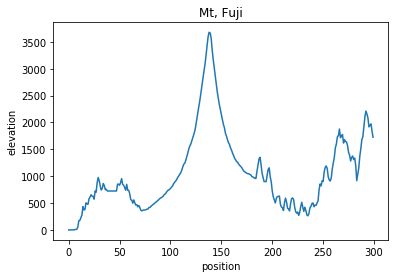

In [4]:
plt.title("Mt, Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(fuji[:, 0], fuji[:, 3]) 
plt.show()

***

**【問題2】ある地点の勾配を計算する関数を作成**  
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

![](https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png)

In [5]:
#標高のndarray
elevation_array = fuji[:, 3]

#地点のndarray
point_array = fuji[:, 0]

def compute_gradient(point):
    """
    ある地点の勾配を返す関数
    
    Parameter
    ----------
    point：ある地点
    
    Return
    ----------
    gradient：ある地点での勾配
    """ 
    #勾配
    gradient = (elevation_array[point] - elevation_array[point - 1]) / (point_array[point] - point_array[point - 1])
    gradient = float(gradient)
    
    return gradient

**【問題3】移動先の地点を計算する関数を作成**  
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと **「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」**となります。


「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。


《実装上の注意》  
上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。


《ハイパーパラメータとは》  
機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [6]:
def now_point(gradient):
    """
    今いる地点の勾配を入力すると、今いる地点を返す関数
    
    Parameter
    ----------
    gradient：今いる地点の勾配
    
    Return
    ----------
    now_point：今いる地点
    """
    elevation_array = fuji[:, 3] #標高
    point_array = fuji[:, 0] #地点
    gradient_array = (elevation_array[1:] - elevation_array[:-1]) / (point_array[1:] - point_array[:-1]) #勾配
    
    #今いる位置をgradient_arrayを参照して特定する
    #入力された勾配の値が複数地点存在する場合は、勾配の値を変更するよう促す
    #入力された勾配の値が存在しない場合は、存在する勾配の値を入力するよう促す
    #np.whereで返るデータ型はタプルなのでリストに変換してから足し算する
    point_list = list(np.where(gradient_array == gradient))
    
    if len(point_list[0]) >= 2:
        print("入力された勾配の地点は複数あるので、今いる地点を特定できません。勾配の値を変更してください。")
        return
    elif len(point_list[0]) == 0:
        print("入力された勾配の地点は存在しません。存在する勾配の値を入力してください。")
        return
    else:
        now_point = int(point_list[0] + 1) #next_point関数で計算に使うため、int型に変換
    
    return now_point


#「今いる地点は不明だが勾配は既知」の場合の、次の移動先地点を返す関数
def next_point_unknown_nowpoint(gradient):
    """
    今いる地点の勾配を入力すると、次の移動先の地点を計算する関数
    
    Parameter
    -------
    gradient；今いる地点の勾配
    
    Return
    --------
    next_point：移動先の地点
    """
    learning_rate = 0.2 #学習率
    
    #不適切な勾配の値を入れた際、処理をやめる。その場合、now_point関数で作成したメッセージが表示される。
    if now_point(gradient) == None:
        return
    
    next_point = now_point(gradient) - (learning_rate*gradient) 
    next_point = Decimal(str(next_point)).quantize(Decimal("0"), rounding=ROUND_HALF_UP)
    
    return next_point


#「今いる地点が既知 = 勾配も既知」の場合の、次の移動先地点を返す関数
def next_point_known_nowpoint(first_point, learning_rate=0.2):
    """
    今いる地点を入力すると、次の移動先の地点を計算する関数
    
    Parameter
    -------
    first_point：今いる地点
    learning_rate：学習率
    
    Return
    --------
    next_point：移動先の地点
    """
    next_point = first_point - (learning_rate*compute_gradient(first_point))
    next_point = Decimal(str(next_point)).quantize(Decimal("0"), rounding=ROUND_HALF_UP)
    
    if next_point >= 300: #移動先地点が300以上の場合、299に丸める
        next_point = 299
    if next_point < 0: #移動先地点が負の数の場合、0に丸める
        next_point = 0
    
    return next_point

***

**【問題4】山を下る関数を作成**  
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。


《実装上の注意》  
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [7]:
def descent(first_point, learning_rate=0.2):
    """
    最初の地点を受け取り、next_point_known_nowpoint関数を用いて地点を更新。
    下山するまで地点更新を繰り返し、その過程をリストで返す関数。
    ※下山終了の条件は、下記①,②のいずれかを満たした場合
    　①移動先地点が2回連続で同じ地点になる
    　②移動先地点の勾配が現在の勾配より高くなった場合
    
    Parameter
    --------
    first_point：最初の地点
    
    Return
    --------
    descent_list：地点更新の過程のリスト
    """    
    elevation_array = fuji[:, 3] #標高
    descent_list = [first_point]
    
    while True:
        point = next_point_known_nowpoint(first_point, learning_rate)
        descent_list.append(int(point))
        first_point = int(point)
        
        if descent_list[-1] == descent_list[-2]:
            break
        if elevation_array[descent_list[-1]] > elevation_array[descent_list[-2]]:
            descent_list.pop(-1)
            break
        
        #移動回数が1000回を超えた場合無限ループに入ったと判断し、最初の地点や学習率を変更するよう促してから処理を停止する
        #if len(descent_list) > 1000:
        #    descent_list = ["無限ループエラー"]
        #    break
                
    return descent_list

In [8]:
print(descent(136))
print(elevation_array[descent(136)])
print("136地点(標高：{})から下山すると、{}地点(標高：{})で下山が終わる。".\
      format(elevation_array[descent(136)][0], descent(136)[-1], elevation_array[descent(136)][-1]))

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73]
[3434.59  817.62  741.17  672.36  631.71  575.07  505.1   458.66  418.41
  368.91]
136地点(標高：3434.59)から下山すると、73地点(標高：368.91)で下山が終わる。


***

**【問題5】下山過程の可視化**  
問題4における下山過程をMatplotlibを使いグラフで可視化してください。


《可視化例》  
- 断面図の中に移動した地点を点で表示する
- 繰り返し毎の標高や勾配を折れ線グラフにする

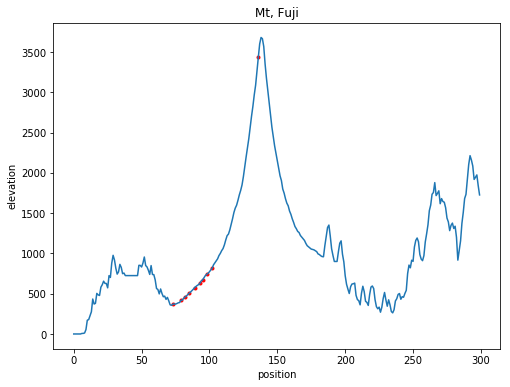

赤い点が下山過程の点
標高の変化[3434.59  817.62  741.17  672.36  631.71  575.07  505.1   458.66  418.41
  368.91]


In [9]:
#地点のndarray
point_array = fuji[:, 0]

#標高のndarray
elevation_array = fuji[:, 3]

plt.figure(figsize=(8, 6))
plt.title("Mt, Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(point_array, elevation_array) 
plt.scatter(descent(136), elevation_array[descent(136)], marker='.', color="red") #ndarrayの要素をリストで指定できる！
plt.show()
print("赤い点が下山過程の点")
print("標高の変化{}".format(elevation_array[descent(136)]))

***

**【問題6】初期値の変更**  
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。


《初期値とは》  
今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [10]:
#最初の地点を全ての点で試した際の下山した地点をリストで順に表示する
descent_result_list = []

for i in range(len(point_array)):
    descent_result_list.append(descent(i)[-1])

print(descent_result_list)
print(len(descent_result_list))

[0, 1, 2, 3, 4, 5, 5, 7, 7, 1, 0, 0, 2, 4, 0, 15, 16, 0, 18, 19, 0, 15, 4, 23, 24, 25, 0, 27, 0, 0, 41, 31, 47, 27, 15, 43, 36, 37, 44, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4, 49, 50, 41, 37, 74, 80, 74, 74, 43, 80, 59, 73, 80, 62, 74, 64, 75, 74, 74, 75, 69, 75, 71, 72, 73, 74, 75, 75, 75, 75, 73, 80, 75, 73, 80, 75, 73, 80, 75, 73, 73, 75, 73, 75, 73, 73, 73, 75, 75, 73, 75, 75, 75, 73, 73, 75, 75, 73, 75, 73, 73, 75, 73, 75, 73, 75, 75, 73, 73, 73, 73, 73, 73, 73, 75, 75, 75, 75, 73, 73, 75, 73, 73, 73, 75, 75, 75, 73, 75, 73, 180, 180, 185, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 183, 180, 183, 182, 183, 184, 185, 186, 180, 182, 216, 222, 216, 205, 193, 194, 195, 180, 216, 231, 218, 234, 222, 227, 203, 204, 205, 205, 205, 216, 209, 210, 211, 212, 213, 227, 215, 216, 224, 218, 219, 224, 227, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 

In [11]:
print("下山の最終地点が180になる初期地点は、\n{}".format([i for i, point in enumerate(descent_result_list) if point == 180]))
print("下山の最終地点が283になる初期地点は、\n{}".format([i for i, point in enumerate(descent_result_list) if point == 283]))
print("初期地点が139と283の場合の下山過程を以下の図に示す。")

下山の最終地点が180になる初期地点は、
[139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 187, 196]
下山の最終地点が283になる初期地点は、
[283]
初期地点が139と283の場合の下山過程を以下の図に示す。


- 初期地点が139の場合の下山過程

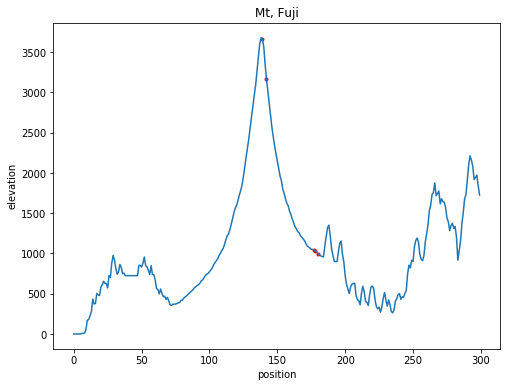

赤い点が下山過程の点
標高の変化[3664.9  3171.53 1043.91 1033.52  993.63]


In [12]:
plt.figure(figsize=(8, 6))
plt.title("Mt, Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(point_array, elevation_array) 
plt.scatter(descent(139), elevation_array[descent(139)], marker='.', color="red") #ndarrayの要素をリストで指定できる！
plt.show()
print("赤い点が下山過程の点")
print("標高の変化{}".format(elevation_array[descent(139)]))

- 初期地点が283の場合の下山過程

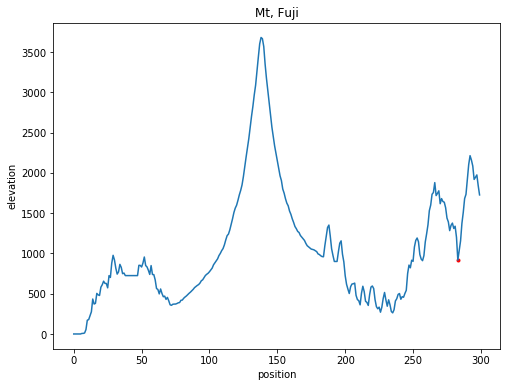

赤い点が下山過程の点
標高の変化[916.3]
最初の地点から移動していない


In [13]:
plt.figure(figsize=(8, 6))
plt.title("Mt, Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(point_array, elevation_array) 
plt.scatter(descent(283), elevation_array[descent(283)], marker='.', color="red") #ndarrayの要素をリストで指定できる！
plt.show()
print("赤い点が下山過程の点")
print("標高の変化{}".format(elevation_array[descent(283)]))
print("最初の地点から移動していない")

***

**【問題7】（アドバンス問題）ハイパーパラメータの変更**  
ハイパーパラメータ $\alpha$ を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

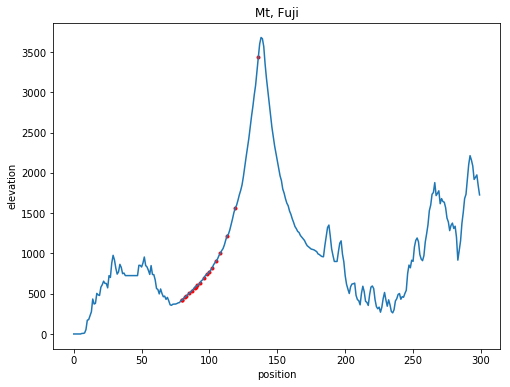

赤い点が下山過程の点
標高の変化[3434.59 1561.94 1219.86 1000.24  910.5   817.62  772.58  741.17  700.15
  631.71  602.36  588.99  575.07  536.54  505.1   471.82  458.66  420.6
  420.6 ]


In [14]:
#ハイパーパラメータ＝0.1、最初の地点が136の場合の下山過程

plt.figure(figsize=(8, 6))
plt.title("Mt, Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(point_array, elevation_array) 
plt.scatter(descent(136, learning_rate=0.1), elevation_array[descent(136, learning_rate=0.1)], marker='.', color="red") #ndarrayの要素をリストで指定できる！
plt.show()
print("赤い点が下山過程の点")
print("標高の変化{}".format(elevation_array[descent(136, learning_rate=0.1)]))

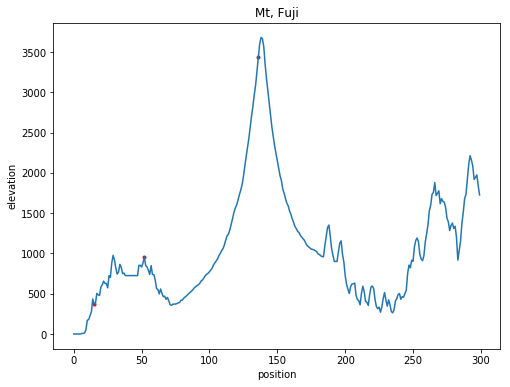

赤い点が下山過程の点
標高の変化[3434.59  955.14  371.74]


In [15]:
#ハイパーパラメータ＝0.5、最初の地点が136の場合の下山過程

plt.figure(figsize=(8, 6))
plt.title("Mt, Fuji")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(point_array, elevation_array) 
plt.scatter(descent(136, learning_rate=0.5), elevation_array[descent(136, learning_rate=0.5)], marker='.', color="red") #ndarrayの要素をリストで指定できる！
plt.show()
print("赤い点が下山過程の点")
print("標高の変化{}".format(elevation_array[descent(136, learning_rate=0.5)]))

上記2つのグラフより以下のことがわかる。
- 学習率が小さくなれば、移動回数は増える（大きくなれば移動回数は減る）
- 学習率が大きくなると谷を飛び越えてしまう可能性がある
- 学習率だけでなく下山の条件設定も重要だとわかる。  
  学習率0.1の際、まだ下山できるにも関わらず下山条件（移動先地点が2回連続で同じ地点になる）を満たしてしまい、  
  学習率0.2の場合より標高の高い位置で終えてしまっている。